In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

from scripts import read_df_params

In [2]:
#NASA Exoplanet Archieve of WASP-17b
# https://exoplanetarchive.ipac.caltech.edu/overview/WASP-17b

In [3]:
df = pd.read_csv("wasp_17b_parameters.csv")#, header=None)
df = df.drop(columns=df.columns[0])


In [4]:
df

Stassun et al. 2017          Patel & Espinoza 2022    Ivshina & Winn 2022  \
0                    0                            ---                    ---   
1         86.63+/-0.42                            ---                    ---   
2  3.735430+/-0.000008  3.7354300+0.0000071-0.0000074  3.7354826+/-0.0000015   
3          1.87+/-0.24                            ---                    ---   
4                  ---                            ---                    ---   
5                  ---              0.180+0.130-0.100                    ---   
6                  ---           0.1218+0.0016-0.0014                    ---   
7                  ---                            ---                    ---   
8              #1f77b4                        #ff7f0e                #2ca02c   

      Bonomo et al. 2017 Barstow et al. 2017 Sedaghati et al. 2016  \
0                  0.020                 ---                     0   
1        86.83+0.68-0.53                 ---       87.06+0.61-0.63   
2  3.7354845+/-0.0000019                 ---              3.735438   
3          1.991+/-0.081                 ---         1.747+/-0.078   
4      0.05151+/-0.00035                 ---       0.0513+/-0.0029   
5                    ---                 ---         0.361+/-0.069   
6                    ---                 ---     0.12345+/-0.00109   
7                    ---                 ---                    90   
8                #d62728             #9467bd               #8c564b   

  Sing et al. 2016 Knutson et al. 2014 Southworth et al. 2012  \
0              ---   0.039+0.050-0.027                      0   
1              ---                 ---           86.71+/-0.30   
2             3.73                 ---  3.7354845+/-0.0000019   
3             1.89                 ---          1.932+/-0.053   
4              ---                 ---      0.05125+/-0.00103   
5              ---                 ---                    ---   
6              ---                 ---        0.1255+/-0.0007   
7              ---           179+/-120                    ---   
8          #e377c2             #7f7f7f                #bcbd22   

    Anderson et al. 2011             Triaud et al. 2010  \
0      0.028+0.015-0.018                           0.11   
1        86.83+0.68-0.56                86.63+0.39-0.45   
2  3.7354380+/-0.0000068  3.7354330+0.0000076-0.0000075   
3          1.991+/-0.081              1.986+0.089-0.074   
4      0.05150+/-0.00034                0.0500+/-0.0017   
5      0.401+0.059-0.077              0.400+0.043-0.040   
6                    ---        0.12929+0.00077-0.00061   
7                  -70.6                            ---   
8                #17becf                              b   

            Anderson et al. 2010     Alderson et al. 2022  
0              0.129+0.106-0.068                      ---  
1                   87.8+2.0-1.0                      ---  
2  3.7354417+0.0000072-0.0000073  3.73548546+/-0.00000027  
3                 1.74+0.26-0.23                      ---  
4            0.051+0.0017-0.0018                      ---  
5                            ---                      ---  
6                            ---                      ---  
7                     290+106-16                      ---  
8                              g                        m

In [5]:
df_ref_list = df.columns

df_e_list = df.loc[0] #Eccentricty row
df_i_list = df.loc[1] #Orbtial inclination row
df_P_list = df.loc[2] #Orbtial period row
df_R_list = df.loc[3] #Planetary radius row
df_a_list = df.loc[4] #Semi-major axis row
df_b_list = df.loc[5] #Impact parameter row
df_RpRs_list = df.loc[6] #R_p/R_star row
df_w_list = df.loc[7]
df_color = df.loc[8] #Colours

e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)



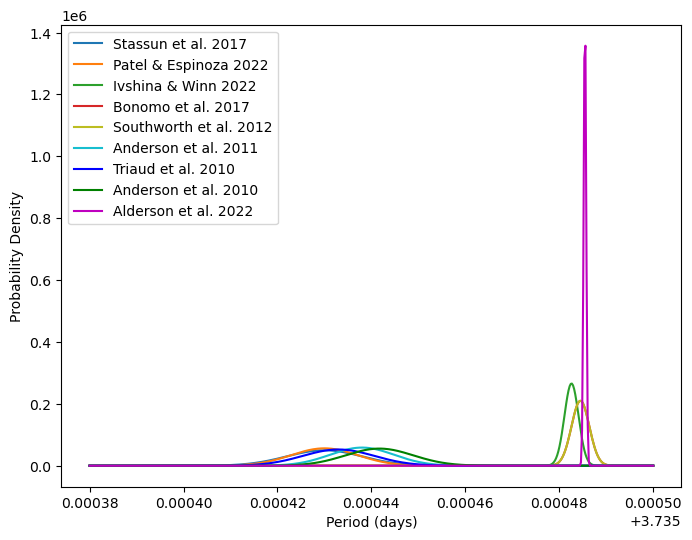

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(3.73538, 3.7355, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

#Same graph seen in https://doi.org/10.1093/mnras/stac661

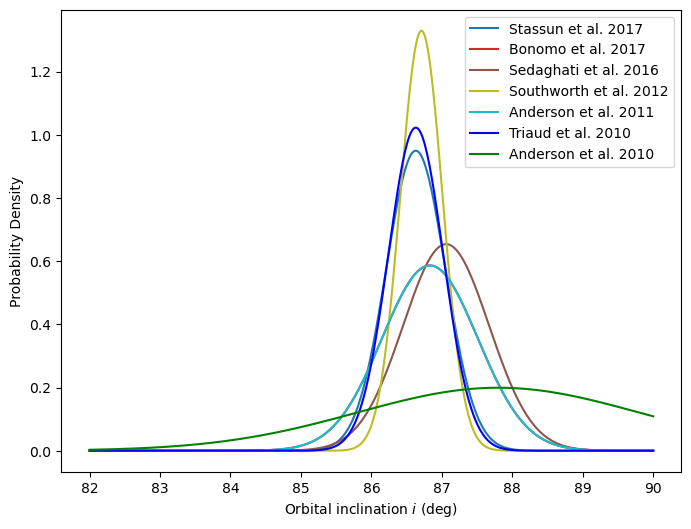

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(82, 90, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

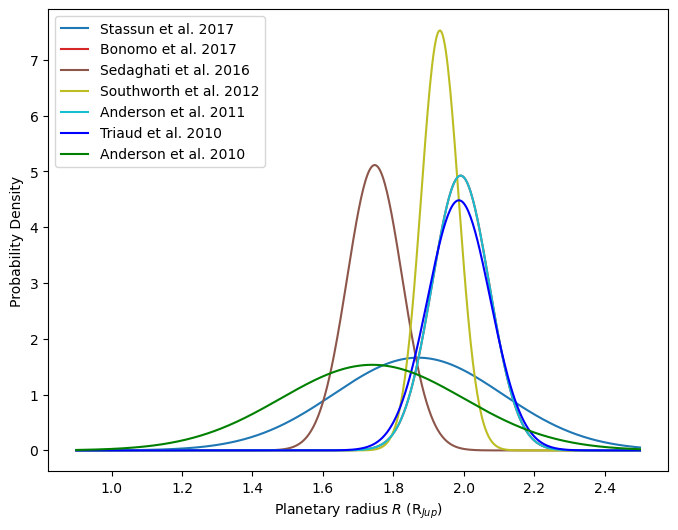

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.9, 2.5, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

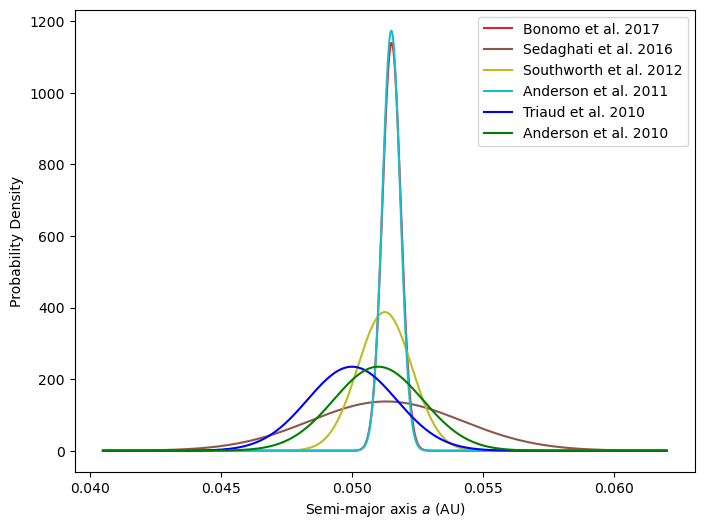

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0405, 0.062, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-major axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

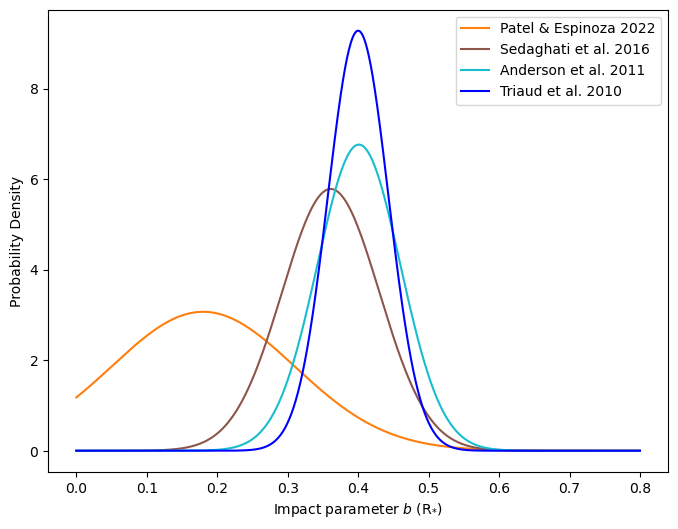

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.0, 0.8, 1000)
for b_obj, author in zip(b_list, b_ref_list):
    mu, upper, lower = b_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Impact parameter $b$ (R$_{*}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

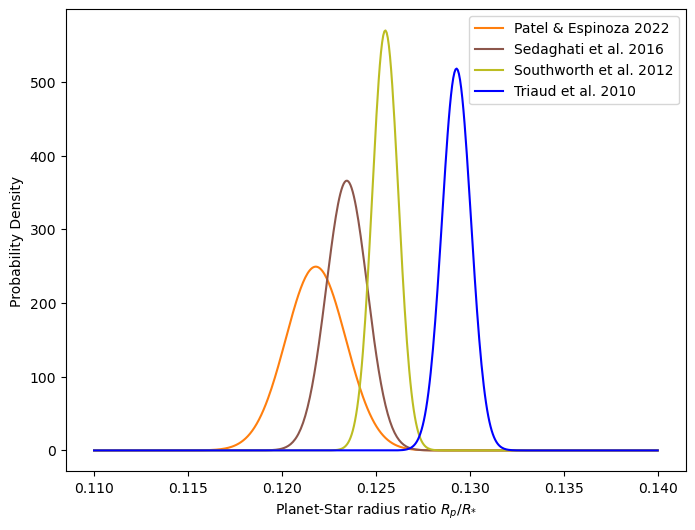

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.11, 0.14, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author][8]
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()